<a href="https://colab.research.google.com/github/minnie-0923/Minnie-Astrophysics/blob/main/GW150914.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 安装GWPy库，用于处理引力波数据
! pip install gwpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 93.2 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 46.0.3 which is incompatible.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 46.0.3 which is incompatible.


In [ ]:
# ==================== 导入必要的库 ====================

# GWPy相关库 - 专门用于引力波数据分析
from gwpy.timeseries import TimeSeries        # 时间序列数据处理
from gwpy.signal import filter_design         # 信号滤波设计
from gwpy.plot import Plot              # 专业绘图工具

# 科学计算和数据处理库
import matplotlib.pyplot as plt
from scipy.io.wavfile import write  # 音频文件写入，用于将引力波信号保存为WAV文件
import numpy as np

# Google Colab特定功能
from google.colab import files  # 文件下载工具，用于将生成的文件下载到本地


In [ ]:

# ==================== 数据获取 ====================

flag = 2
 # 设置为1为GW170817事件 设置为2为GW150914事件

# 设置GPS时间（引力波事件的时间戳）
# 从GWOSC获取汉福德观测站（H1）的应变数据
if flag == 1:
  t0 = 1187008882.4    # GW170817 - 中子星合并事件

  # 时间范围：GW170817事件前后各40秒（总共80秒数据）
  hdata = TimeSeries.fetch_open_data('H1', 1187008842, 1187008922)

else:
  t0 = 1126259462.4    # GW150914 - 第一个被探测到的引力波事件

  # 时间范围：GW150914事件前后各16秒（总共32秒数据）
  hdata = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478)

print(hdata)


TimeSeries([3.06590470e-19, 3.13208962e-19, 3.16538509e-19, ...,
            3.82319420e-19, 3.99422050e-19, 3.92040140e-19]
           unit: dimensionless,
           t0: 1187008842.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


$g(\omega)=\sum\int^{∞}_{0}f(x)sin(\omega x)dx$

$f(x)=\sum\int^{∞}_{0}g(\omega)sin(\omega x)d\omega$


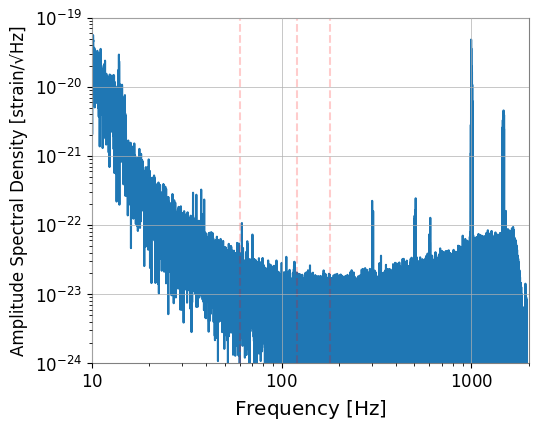

In [ ]:
# ==================== 频谱分析 ====================

# 绘制振幅谱密度（ASD）图来分析频率特性
# ASD是引力波数据分析中最重要的工具之一，用于识别噪声特性和信号特征

# f(x)

# f(x)sin(omega*x)dx

# 计算并绘制振幅谱密度（Amplitude Spectral Density）
# asd()方法对时域数据进行傅里叶变换，计算每个频率分量的振幅密度
# 无参数调用使用默认的FFT长度和窗函数
fig2 = hdata.asd().plot()  # 计算并绘制振幅谱密度

# 设置频率显示范围
# 10-50Hz: 地震噪声和悬架系统共振主导
# 50-300Hz: 引力波信号的主要频段（双星合并）
# 300-2000Hz: 高频区域，包含仪器噪声和可能的信号高频成分
plt.xlim(10, 2000)  # 设置频率显示范围

# 设置振幅密度显示范围
# 应变振幅密度的典型量级：
# 1e-24: 在100Hz附近的仪器灵敏度极限
# 1e-19: 强噪声源或干扰信号的量级
ymin = 1e-24  # 最小振幅密度
ymax = 1e-19  # 最大振幅密度
plt.ylim(ymin, ymax)

# 设置y轴标签
# Amplitude Spectral Density (ASD): 振幅谱密度
# strain/√Hz: 单位 - 应变每根号赫兹
# 这个单位表示在1Hz带宽内的应变振幅
plt.ylabel('Amplitude Spectral Density [strain/√Hz]', fontsize=12)

# LIGO探测器受到当地电网60Hz交流电的干扰，这些干扰会在频谱中产生尖锐的谱线，需要特别处理

# 60Hz基础频率 - 北美电网标准频率
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red", alpha = 0.2)   # 60Hz基础频率

# 120Hz二次谐波 - 60Hz的倍频
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red", alpha = 0.2)  # 120Hz二次谐波

# 180Hz三次谐波 - 60Hz的三倍频
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red", alpha = 0.2)  # 180Hz三次谐波

In [ ]:
# ==================== 滤波器设计 ====================

# 设计带通滤波器（50-250Hz），保留引力波特征频段
bp = filter_design.bandpass(50, 250, hdata.sample_rate)

# 设计陷波滤波器来消除电源线干扰
notches = [filter_design.notch(line, hdata.sample_rate) for line in (60, 120, 180)]

# 合并带通滤波器和所有陷波滤波器
zpk = filter_design.concatenate_zpks(bp, *notches)

# 应用滤波器到数据（使用filtfilt进行零相位滤波）
hfilt = hdata.filter(zpk, filtfilt=True)

# 裁剪数据边界以避免边缘效应
hdata = hdata.crop(*hdata.span.contract(1))
hfilt = hfilt.crop(*hfilt.span.contract(1))

# 打印裁剪后的时间范围
print("裁剪后的数据时间范围:", *hdata.span.contract(1))


裁剪后的数据时间范围: 1187008844.0 1187008920.0


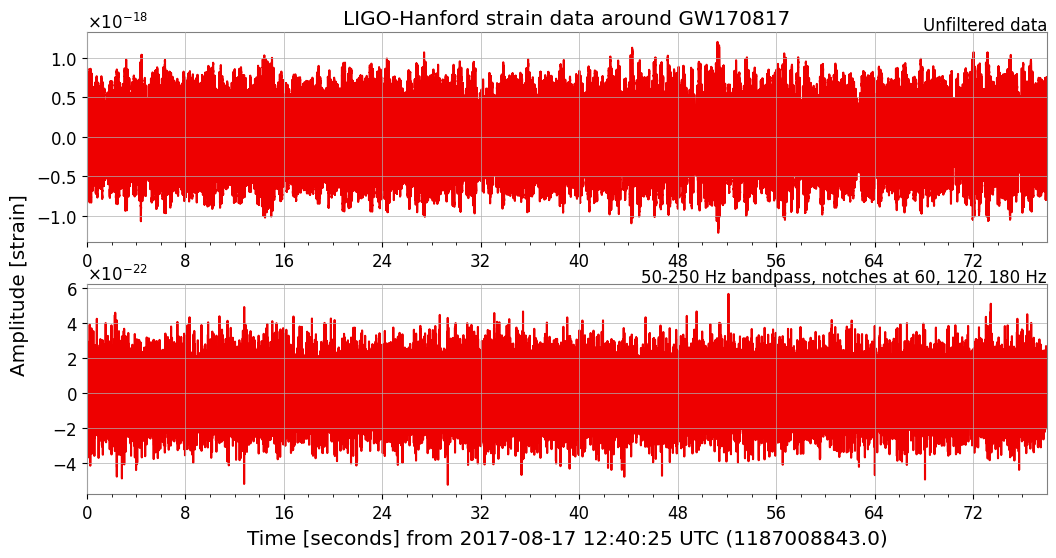

In [ ]:
# ==================== 滤波效果可视化 ====================

# Plot() 是GWPy的高级绘图函数，专门为引力波数据优化
plot = Plot(
    hdata,           # 第一个子图数据：原始应变数据
    hfilt,           # 第二个子图数据：滤波后应变数据
    figsize=[12, 6], # 图形尺寸：宽12英寸，高6英寸
    separate=True,   # 关键参数：在两个独立的子图中显示数据
    sharex=True,     # 关键参数：两个子图共享x轴（时间轴）
    color='gwpy:ligo-hanford'  # 使用GWPy预定义的汉福德观测站颜色
)
ax1, ax2 = plot.axes

if flag == 1:
  text = 'GW170817'
else:
  text = 'GW150914'

# 设置图表标题和标签
# 使用动态标题，根据事件类型显示相应文本
ax1.set_title(f'LIGO-Hanford strain data around {text}')

# 在子图右上角添加文本标注
# transform=ax1.transAxes: 使用坐标轴相对坐标 (0-1范围)
# 1.0, 1.01: 右上角稍微靠上的位置
# ha='right': 文本右对齐
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')

# 设置y轴标签
# y=-0.2: 标签位置稍微向下偏移，避免与刻度重叠
ax1.set_ylabel('Amplitude [strain]', y=-0.2)

# 第二个子图的y轴设为空，因为共享y轴标签
ax2.set_ylabel('')

# 在第二个子图添加滤波器信息标注
ax2.text(1.0, 1.01, r'50-250 Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right')

# 显示图形
plot.show()


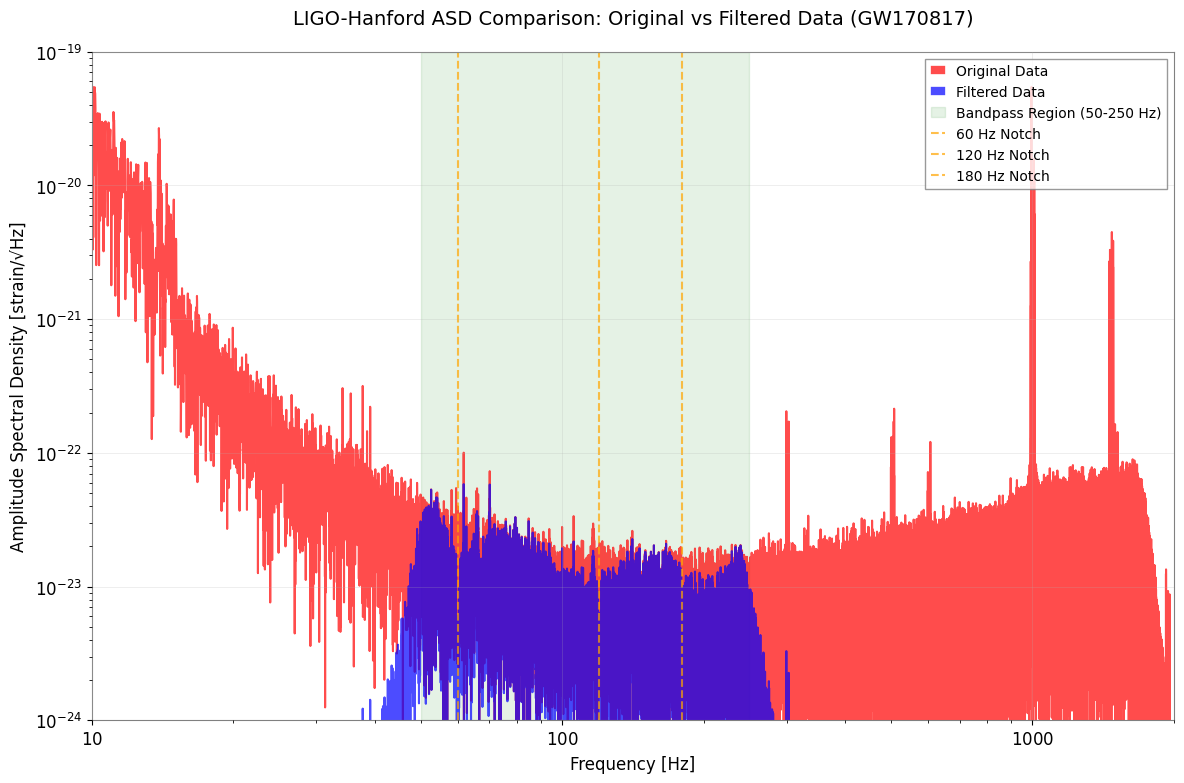

In [ ]:

# ==================== 滤波前后ASD对比 ====================

# 创建新的图形来比较滤波前后的频谱
plt.figure(figsize=[12, 8])

# 计算并绘制原始数据的ASD
# 使用label参数为图例做准备
asd_original = hdata.asd()
plt.plot(asd_original.frequencies, asd_original,
         label='Original Data', color='red', alpha=0.7, linewidth=1.5)

# 计算并绘制滤波后数据的ASD
asd_filtered = hfilt.asd()
plt.plot(asd_filtered.frequencies, asd_filtered,
         label='Filtered Data', color='blue', alpha=0.7, linewidth=1.5)

# 设置坐标轴范围和标签
plt.xlim(10, 2000)
plt.ylim(1e-24, 1e-19)
plt.xlabel('Frequency [Hz]', fontsize=12)
plt.ylabel('Amplitude Spectral Density [strain/√Hz]', fontsize=12)

# 标记滤波器的关键频率
ymin, ymax = 1e-24, 1e-19

# 标记带通滤波器范围
plt.axvspan(50, 250, alpha=0.1, color='green', label='Bandpass Region (50-250 Hz)')

# 标记陷波滤波器频率
plt.vlines(60, ymin, ymax, linestyle="--", color="orange", alpha=0.7, label='60 Hz Notch')
plt.vlines(120, ymin, ymax, linestyle="--", color="orange", alpha=0.7, label='120 Hz Notch')
plt.vlines(180, ymin, ymax, linestyle="--", color="orange", alpha=0.7, label='180 Hz Notch')

# 添加图例和标题
plt.legend(loc='upper right', fontsize=10)
plt.title(f'LIGO-Hanford ASD Comparison: Original vs Filtered Data ({text})',
          fontsize=14, pad=20)

# 添加网格
plt.grid(True, alpha=0.3)

# 使用对数坐标
plt.xscale('log')
plt.yscale('log')

# 显示图形
plt.tight_layout()
plt.show()


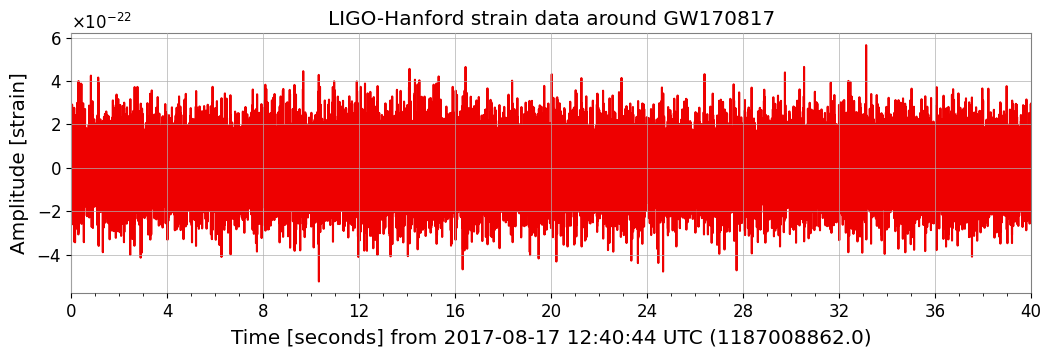

In [ ]:

# ==================== 滤波后数据细节分析 ====================

# 绘制滤波后数据在事件附近的细节
plot = hfilt.plot(color='gwpy:ligo-hanford')
ax = plot.gca()
ax.set_ylabel('Amplitude [strain]')

if flag == 1:
  # 聚焦在GW170817事件发生的关键时间段
  ax.set_title('LIGO-Hanford strain data around GW170817')
  ax.set_xlim(1187008862, 1187008902)
  ax.set_xscale('seconds', epoch=1187008862)  # 以事件时间为零点
  plot.show()
else:
  # 聚焦在GW150914事件发生的关键时间段
  ax.set_title('LIGO-Hanford strain data around GW150914')
  ax.set_xlim(1126259462, 1126259462.6)
  ax.set_xscale('seconds', epoch=1126259462)  # 以事件时间为零点
  plot.show()

# 提取绘图数据用于后续处理
x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()

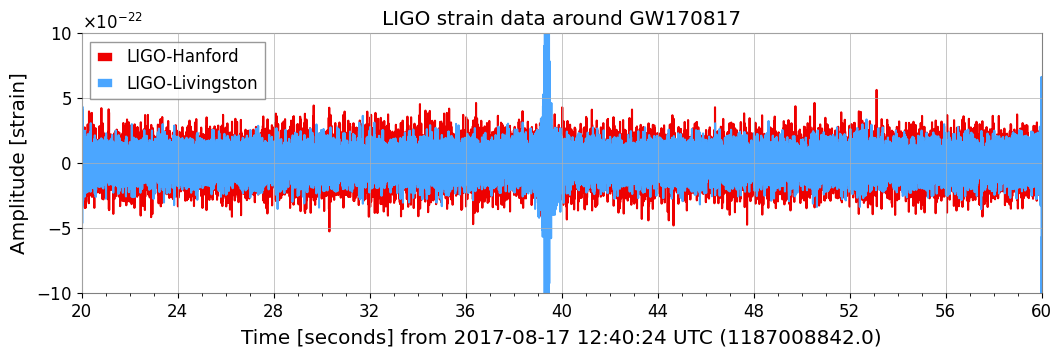

In [ ]:

# ==================== 双观测站数据对比 ====================

if flag == 1:
  # 获取利文斯顿观测站（L1）的数据
  ldata = TimeSeries.fetch_open_data('L1', 1187008862, 1187008902)
else:
  # 获取利文斯顿观测站（L1）的数据
  ldata = TimeSeries.fetch_open_data('L1', 1126259446, 1126259478)

# 应用相同的滤波器
lfilt = ldata.filter(zpk, filtfilt=True)

# 对L1数据进行时间偏移和相位调整
lfilt.shift('6.9ms')  # 补偿信号到达两个观测站的时间差
lfilt *= -1  # 调整相位（由于探测器方向不同）

# 绘制两个观测站数据的对比图
plot = Plot(figsize=[12, 4])
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')

if flag == 1:
  ax.set_title('LIGO strain data around GW170817')
  ax.set_xlim(1187008862, 1187008902)
  ax.set_xscale('seconds', epoch=1187008842)  # 以事件时间为零点
else:
  ax.set_title('LIGO strain data around GW150914')
  ax.set_xlim(1126259462, 1126259462.6)
  ax.set_xscale('seconds', epoch=1126259462)

ax.set_ylabel('Amplitude [strain]')
ax.set_ylim(-1e-21, 1e-21)  # 设置合适的y轴范围以清晰显示信号
ax.legend()
plot.show()


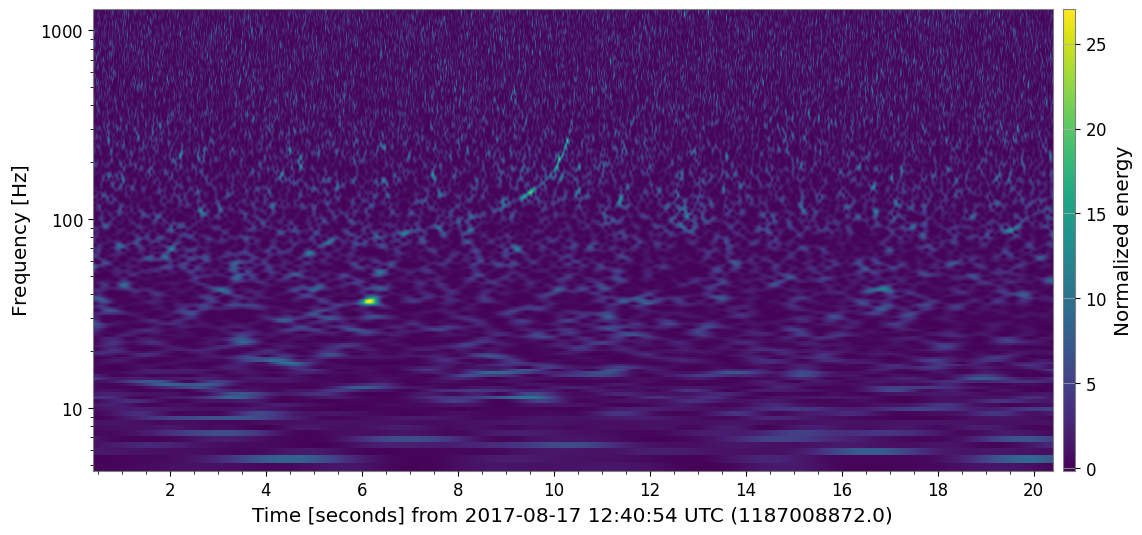

In [ ]:
# ==================== Q变换时频分析 ====================

# 进行Q变换（一种时频分析方法），用于可视化信号的频率随时间变化
if flag == 1:
  dt_0 = 10  # 设置Q变换绘图的时间宽度（秒）
  dt_1 = 10
else:
  dt_0 = 0.2  # 设置Q变换绘图的时间宽度（秒）
  dt_1 = 0.1
hq = hfilt.q_transform(outseg=(t0-dt_0, t0+dt_1))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")  # 颜色条表示归一化能量
ax.grid(False)
ax.set_yscale('log')  # 使用对数频率坐标


音频采样率 fs =  4096


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

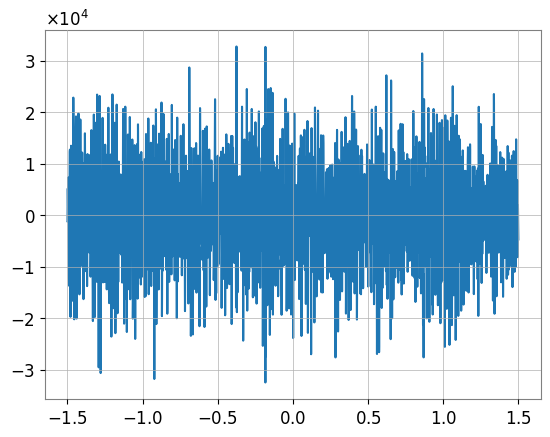

In [ ]:

# ==================== 音频生成 ====================

# 将引力波信号转换为音频文件，让人们可以"听到"引力波
amplitude = np.iinfo(np.int16).max  # 获取16位整数的最大振幅值

# 提取事件前后1.5秒的数据用于生成音频
ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5)))
y = y_val[ind]

# 信号归一化处理
y = y / np.max(y)  # 归一化到[-1, 1]范围

# 绘制用于生成音频的信号段
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16))

# 计算实际采样率并生成WAV文件
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0))))
print("音频采样率 fs = ", fs)
write("gravitational_wave_GW150914.wav", fs, (np.array(y) * amplitude).astype(np.int16))

# 下载生成的音频文件
files.download("gravitational_wave_GW150914.wav")

In [ ]:
pip install gwpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 46.0.3 which is incompatible.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 46.0.3 which is incompatible.


引力波数据分析程序
选择要分析的事件:
1. GW170817 (中子星合并)
2. GW150914 (黑洞合并)
请输入选择 (1 或 2, 默认2): 1
是否生成音频文件? (y/n, 默认y): y
开始分析引力波事件: GW170817
从GWOSC获取应变数据...
成功获取 GW170817 数据: 327680 个数据点
进行频谱分析...


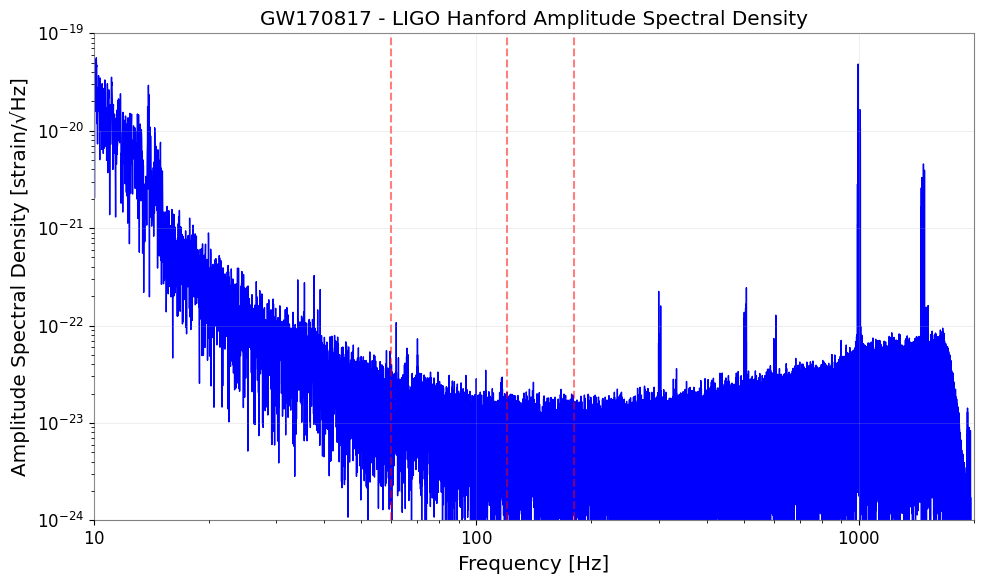

设计滤波器...
滤波器应用完成
绘制滤波效果...
比较滤波前后频谱...


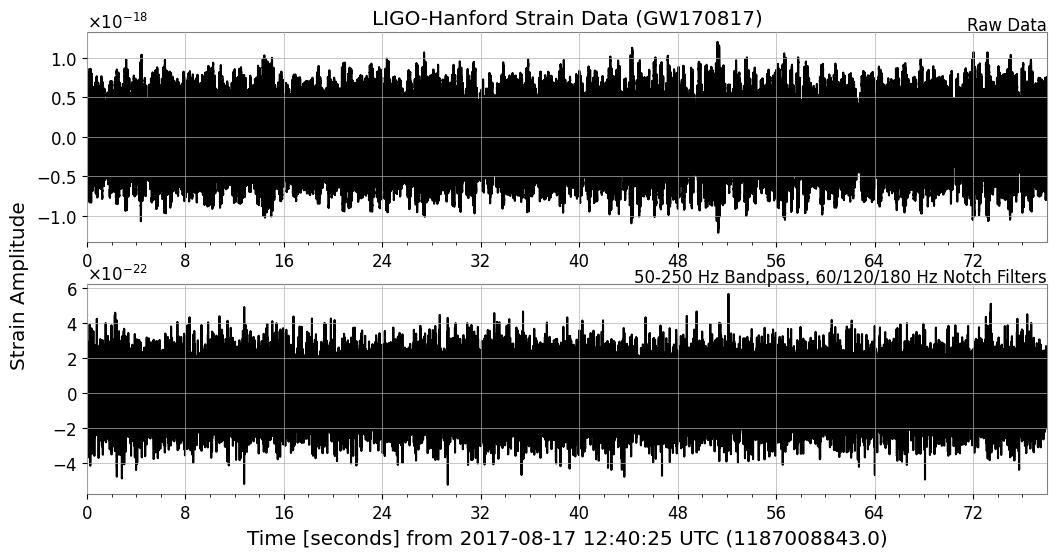

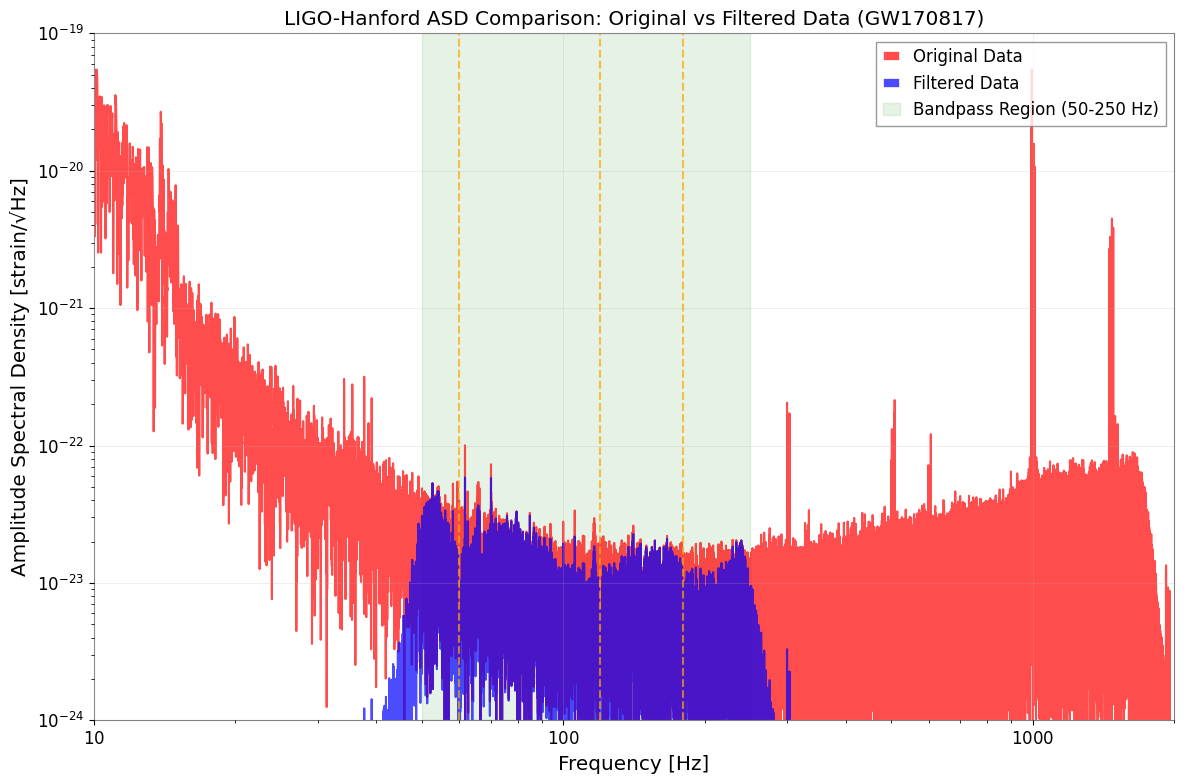

分析滤波后数据细节...
获取利文斯顿观测站数据进行比较...
进行Q变换时频分析...


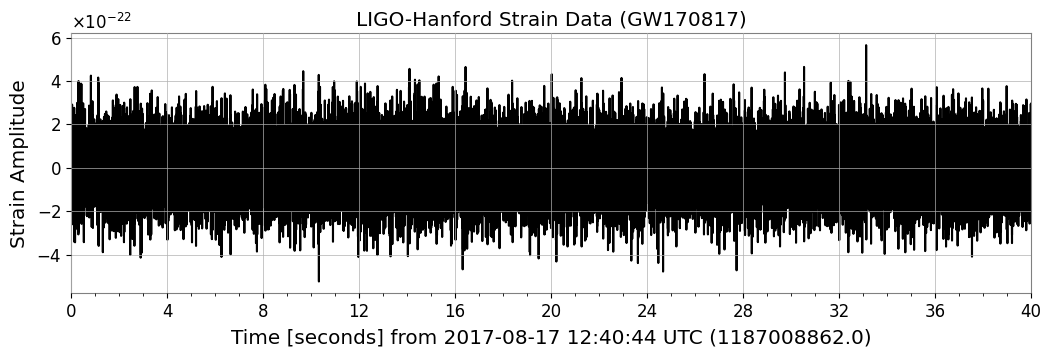

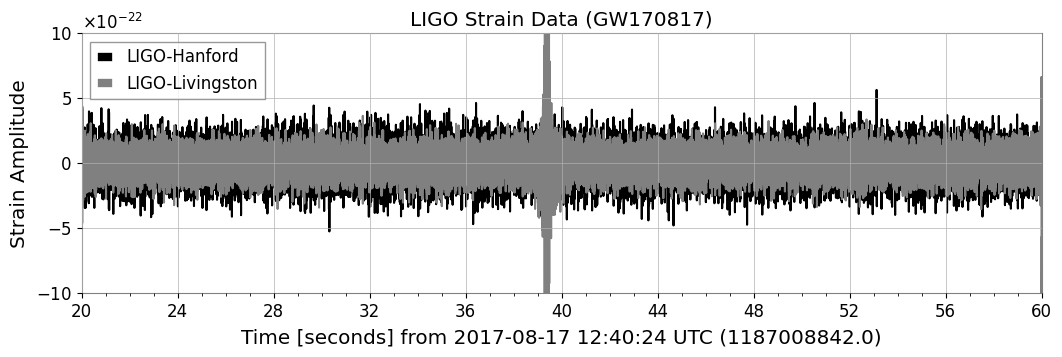

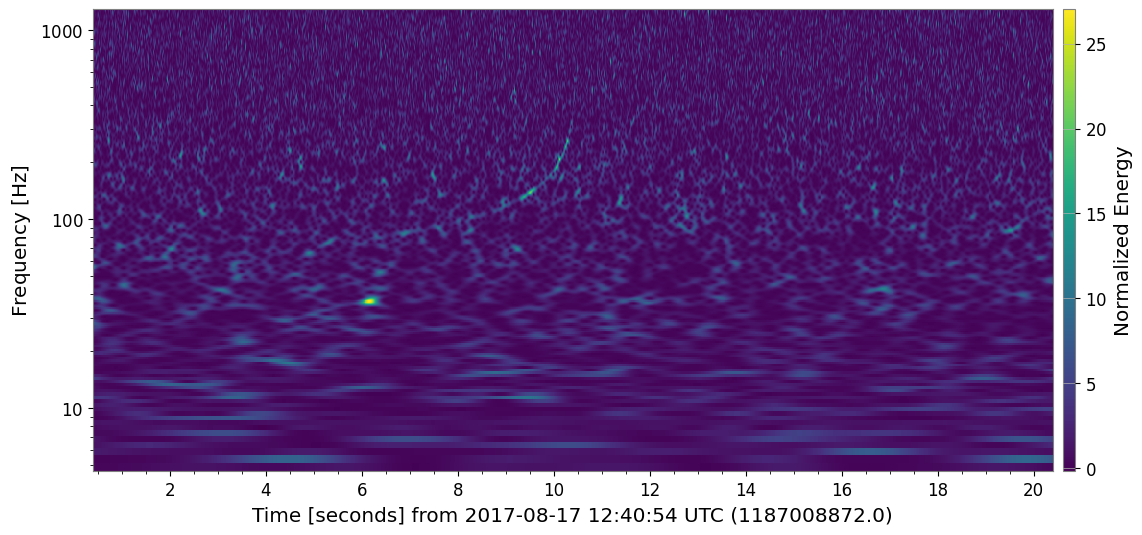

生成引力波音频文件...
音频采样率 fs = 4096
音频文件已保存: gravitational_wave_GW170817.wav
分析完成！


In [ ]:
#!/usr/bin/env python3
"""
Gravitational Wave Data Analysis Main Program
Based on LIGO data from GW150914 and GW170817 events
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import warnings
warnings.filterwarnings('ignore')

# ==================== Import necessary libraries ====================
try:
    from gwpy.timeseries import TimeSeries
    from gwpy.signal import filter_design
    from gwpy.plot import Plot
except ImportError:
    print("Error: Please install GWPy library first: pip install gwpy")
    exit(1)


def analyze_gravitational_wave(event_type=2, generate_audio=True):
    """
    Main analysis function

    Parameters:
    event_type: 1=GW170817, 2=GW150914
    generate_audio: whether to generate audio files
    """

    print(f"开始分析引力波事件: {'GW170817' if event_type == 1 else 'GW150914'}")
    print("=" * 50)

    # ==================== 数据获取 ====================
    print("从GWOSC获取应变数据...")

    if event_type == 1:
        # GW170817 - 中子星合并事件
        t0 = 1187008882.4
        start_time = 1187008842
        end_time = 1187008922
        event_name = "GW170817"
    else:
        # GW150914 - 第一个黑洞合并事件
        t0 = 1126259462.4
        start_time = 1126259446
        end_time = 1126259478
        event_name = "GW150914"

    # 获取汉福德观测站数据
    hdata = TimeSeries.fetch_open_data('H1', start_time, end_time)
    print(f"成功获取 {event_name} 数据: {len(hdata)} 个数据点")

    # ==================== 频谱分析 ====================
    print("进行频谱分析...")

    plt.figure(figsize=[10, 6])
    asd = hdata.asd()
    plt.plot(asd.frequencies, asd, color='blue', linewidth=1)
    plt.xlim(10, 2000)
    plt.ylim(1e-24, 1e-19)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude Spectral Density [strain/√Hz]')
    plt.title(f'{event_name} - LIGO Hanford Amplitude Spectral Density')
    plt.grid(True, alpha=0.3)

    # 标记电源线干扰
    ymin, ymax = 1e-24, 1e-19
    for freq in [60, 120, 180]:
        plt.axvline(freq, linestyle="--", color="red", alpha=0.5)

    plt.tight_layout()
    plt.show()

    # ==================== 滤波器设计 ====================
    print("设计滤波器...")

    # 设计带通滤波器（50-250Hz）
    bp = filter_design.bandpass(50, 250, hdata.sample_rate)

    # 设计陷波滤波器消除电源线干扰
    notches = [filter_design.notch(line, hdata.sample_rate) for line in (60, 120, 180)]

    # 合并滤波器
    zpk = filter_design.concatenate_zpks(bp, *notches)

    # 应用滤波器
    hfilt = hdata.filter(zpk, filtfilt=True)

    # 裁剪数据边界以避免边缘效应
    hdata = hdata.crop(*hdata.span.contract(1))
    hfilt = hfilt.crop(*hfilt.span.contract(1))

    print("滤波器应用完成")

    # ==================== 滤波效果可视化 ====================
    print("绘制滤波效果...")

    plot = Plot(
        hdata,
        hfilt,
        figsize=[12, 6],
        separate=True,
        sharex=True,
        color='black'
    )
    ax1, ax2 = plot.axes

    ax1.set_title(f'LIGO-Hanford Strain Data ({event_name})')
    ax1.text(1.0, 1.01, 'Raw Data', transform=ax1.transAxes, ha='right')
    ax1.set_ylabel('Strain Amplitude', y=-0.2)

    ax2.set_ylabel('')
    ax2.text(1.0, 1.01, '50-250 Hz Bandpass, 60/120/180 Hz Notch Filters',
             transform=ax2.transAxes, ha='right')

    plot.show()

    # ==================== 滤波前后ASD对比 ====================
    print("比较滤波前后频谱...")

    plt.figure(figsize=[12, 8])

    asd_original = hdata.asd()
    plt.plot(asd_original.frequencies, asd_original,
             label='Original Data', color='red', alpha=0.7, linewidth=1.5)

    asd_filtered = hfilt.asd()
    plt.plot(asd_filtered.frequencies, asd_filtered,
             label='Filtered Data', color='blue', alpha=0.7, linewidth=1.5)

    plt.xlim(10, 2000)
    plt.ylim(1e-24, 1e-19)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude Spectral Density [strain/√Hz]')

    # 标记滤波器范围
    plt.axvspan(50, 250, alpha=0.1, color='green', label='Bandpass Region (50-250 Hz)')

    for freq in [60, 120, 180]:
        plt.axvline(freq, linestyle="--", color="orange", alpha=0.7)

    plt.legend(loc='upper right')
    plt.title(f'LIGO-Hanford ASD Comparison: Original vs Filtered Data ({event_name})')
    plt.grid(True, alpha=0.3)
    plt.xscale('log')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

    # ==================== 滤波后数据细节分析 ====================
    print("分析滤波后数据细节...")

    plot = hfilt.plot(color='black')
    ax = plot.gca()
    ax.set_ylabel('Strain Amplitude')

    if event_type == 1:
        ax.set_title('LIGO-Hanford Strain Data (GW170817)')
        ax.set_xlim(1187008862, 1187008902)
        ax.set_xscale('seconds', epoch=1187008862)
    else:
        ax.set_title('LIGO-Hanford Strain Data (GW150914)')
        ax.set_xlim(1126259462, 1126259462.6)
        ax.set_xscale('seconds', epoch=1126259462)

    plot.show()

    # 提取绘图数据用于后续处理
    x_val = plt.gca().lines[0].get_xdata()
    y_val = plt.gca().lines[0].get_ydata()

    # ==================== 双观测站数据对比 ====================
    print("获取利文斯顿观测站数据进行比较...")

    if event_type == 1:
        ldata = TimeSeries.fetch_open_data('L1', 1187008862, 1187008902)
    else:
        ldata = TimeSeries.fetch_open_data('L1', 1126259446, 1126259478)

    # 应用相同的滤波器
    lfilt = ldata.filter(zpk, filtfilt=True)

    # 对L1数据进行时间偏移和相位调整
    lfilt.shift('6.9ms')
    lfilt *= -1

    # 绘制两个观测站数据的对比图
    plot = Plot(figsize=[12, 4])
    ax = plot.gca()
    ax.plot(hfilt, label='LIGO-Hanford', color='black')
    ax.plot(lfilt, label='LIGO-Livingston', color='gray')

    if event_type == 1:
        ax.set_title('LIGO Strain Data (GW170817)')
        ax.set_xlim(1187008862, 1187008902)
        ax.set_xscale('seconds', epoch=1187008842)
    else:
        ax.set_title('LIGO Strain Data (GW150914)')
        ax.set_xlim(1126259462, 1126259462.6)
        ax.set_xscale('seconds', epoch=1126259462)

    ax.set_ylabel('Strain Amplitude')
    ax.set_ylim(-1e-21, 1e-21)
    ax.legend()
    plot.show()

    # ==================== Q变换时频分析 ====================
    print("进行Q变换时频分析...")

    if event_type == 1:
        dt_0 = 10
        dt_1 = 10
    else:
        dt_0 = 0.2
        dt_1 = 0.1

    hq = hfilt.q_transform(outseg=(t0-dt_0, t0+dt_1))
    fig4 = hq.plot()
    ax = fig4.gca()
    fig4.colorbar(label="Normalized Energy")
    ax.grid(False)
    ax.set_yscale('log')
    plt.show()

    # ==================== 音频生成 ====================
    if generate_audio:
        print("生成引力波音频文件...")

        amplitude = np.iinfo(np.int16).max

        # 提取事件前后1.5秒的数据用于生成音频
        ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5)))
        y = y_val[ind]

        # 信号归一化处理
        y = y / np.max(y)

        # 计算实际采样率并生成WAV文件
        fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0))))
        print(f"音频采样率 fs = {fs}")

        filename = f"gravitational_wave_{event_name}.wav"
        write(filename, fs, (np.array(y) * amplitude).astype(np.int16))
        print(f"音频文件已保存: {filename}")

    print("=" * 50)
    print("分析完成！")
    return hdata, hfilt


if __name__ == "__main__":
    # 示例用法
    print("引力波数据分析程序")
    print("选择要分析的事件:")
    print("1. GW170817 (中子星合并)")
    print("2. GW150914 (黑洞合并)")

    try:
        choice = int(input("请输入选择 (1 或 2, 默认2): ") or "2")
        audio_choice = input("是否生成音频文件? (y/n, 默认y): ").lower() or "y"

        generate_audio = audio_choice in ['y', 'yes', '是']

        # 运行分析
        original_data, filtered_data = analyze_gravitational_wave(
            event_type=choice,
            generate_audio=generate_audio
        )

    except KeyboardInterrupt:
        print("\n用户中断程序")
    except Exception as e:
        print(f"发生错误: {e}")